# Lesson6. Camera Calibration

## Types of Distortion
- Radial Distortion
  : Distortion caused by light refrection of lens

- Tangential Distortion
  : Distortion cause by camera placement(tilted, etc)
  
![Distortion images](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRfir4Slxps73B-4NgIFtqnWJNgPIlTiZUUYg&usqp=CAU)

## Camera Calibration using Chessboard with OpenCV

### Finding corners
OpenCV provides functions **<code>cv2.findChessboardCorners()</code>** which literally returns the coordinates of the corners in the chessboard image.   
(Note : corners that are found by **<code>cv2.findChessboardCorners()</code>** only includes inside corners, not outer corners

**<code>retval, corners = cv2.findChessboardCorners(image, patternSize, flag)</code>**

|Parameter|Explanation|
|---|---|
| image | source image |
|patternSize | size of image (nx, ny) |

|Return|Explanation|
|---|---|
| retval | indicates whehter function is executed successfully or not |
| corners | coordinates of corners |

#### Steps
1. Load the image
2. Convert the image to grayscale
3. Use **<code>ret, corners = cv2.findChessboardCorners(image_grayscale, (nx, ny))</code>**
4. Draw the corners **<code>cv2.drawChessboardCorners(img, (nx, ny), corners, ret)</code>**

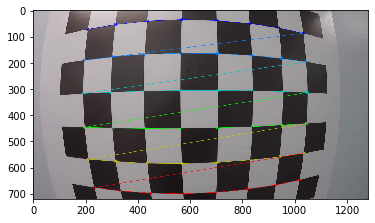

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# prepare object points
#TODO: enter the number of inside corners in x
nx = 8
#TODO: enter the number of inside corners in y
ny = 6

# Make a list of calibration images
fname = 'calibration_test.png'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny))

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

### Calibration

- cv2.calibrateCamera()  
**<code>retval, cameraMatrix, distCoeffs, rvecs, tvecs   
    = cv2.calibrateCamera(objectPoints, imagePoints, imageSize, flags, criteria)</code>**

|Parameter|Explanation|
|---|---|
| objectPoints | Coordinates of the corners of the checkboard in Real World, (0,0,0) ~ (7, 5, 0) |
| imagePoints | Coordinates of the corners in the image file(2D), ( , ) |
| imageSize |  Size of image (nx, ny) |
| flags |  |
| criteria |  |

|Return|Explanation|
|---|---|
| retval | Indicates whehter function is executed successfully or not |
| cameraMatrix | Output 3X3 floating point camera matrix  |
| distCoeffs | Output vector of distortion coefficients (k1, k2, p1, p2, p3...) |
| rvecs | Output vector of rotation vectors |
| tvecs | Output vector of translation vectors |

- cv2.undistort()   
**<code>image_undistorted = cv2.undistort(image, matrix, distCoeffs, dst, newCameraMatrix)</code>**

|Parameter|Explanation|
|---|---|
| image | Source image |
| matrix | Camera matrix |
| distCoeffs |  vector of distortion coefficients (k1, k2, p1, p2, p3...) |
| dst |  |
| newCameraMatrix |  |

|Return|Explanation|
|---|---|
| image_undistorted | undistorted image |


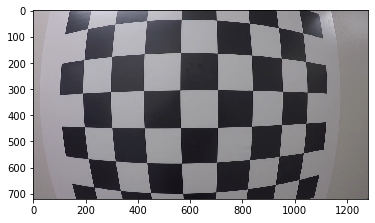

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Read in a calibration image
img = mpimg.imread('calibration_test.png')
plt.imshow(img)

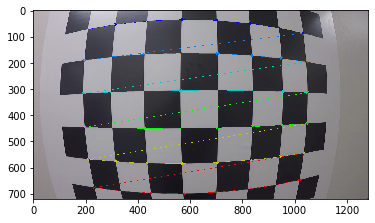

In [3]:
# Arrays to store object points and image points from all the images
objpoints = []     # 3D points in real world space
imgpoints = []     # 2D points in image plane

# Prepare object points, like (0, 0, 0), (1, 0, 0), (2, 0, 0), (7, 5, 0)
objp = np.zeros((6*8, 3), np.float32)
objp[:, :2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2)     # x, y coordinates

# Convert the image to grayscale
gray = np.uint8(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) * 255)

# FInd the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)

# if corners are found, add object points, image points
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    
    # draw and display the corners
    img = cv2.drawChessboardCorners(img, (8, 6), corners, ret)
    plt.imshow(img)

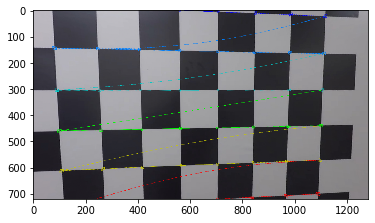

In [5]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)

### Camera Calibration with OpenCV

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('calibration_wide/GO*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

#### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera
#### calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

Text(0.5, 1.0, 'Undistorted Image')

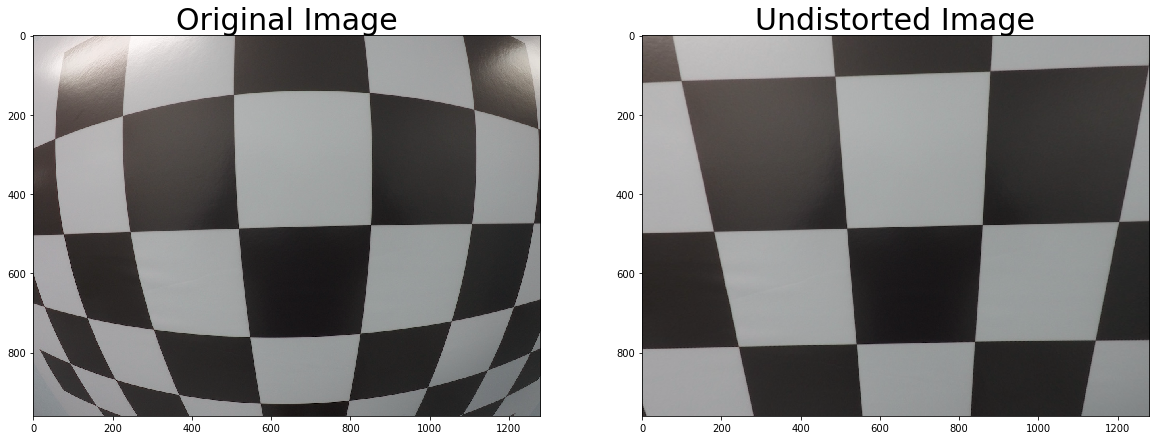

In [2]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('calibration_wide/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## Perspective Transform
Perspective transform is neeeded to convert the perspective of the image to top-down perspective(Bird's eyes view)   
in order to calculate the exact curvature.

To do that, we can use OpenCV functions
- **<code>M = cv2.getPerspectiveTransform(src, dst)</code>**

|Parameter|Explanation|
|---|---|
| src | Rectangular Coordinates of the corners in the image file(2D), ( , ) |
| dst | Destination of source coordinates |

|Return|Explanation|
|---|---|
| M | Converting Matrix |

- **<code>warped = cv2.warpPerspective(image, M, img_size)</code>**

|Parameter|Explanation|
|---|---|
| image | original image |
| M | Converting Matrix |
| img_size | image size(2D) |

|Return|Explanation|
|---|---|
| warped | modified(warped) image |


Text(0.5, 1.0, 'Undistorted Image')

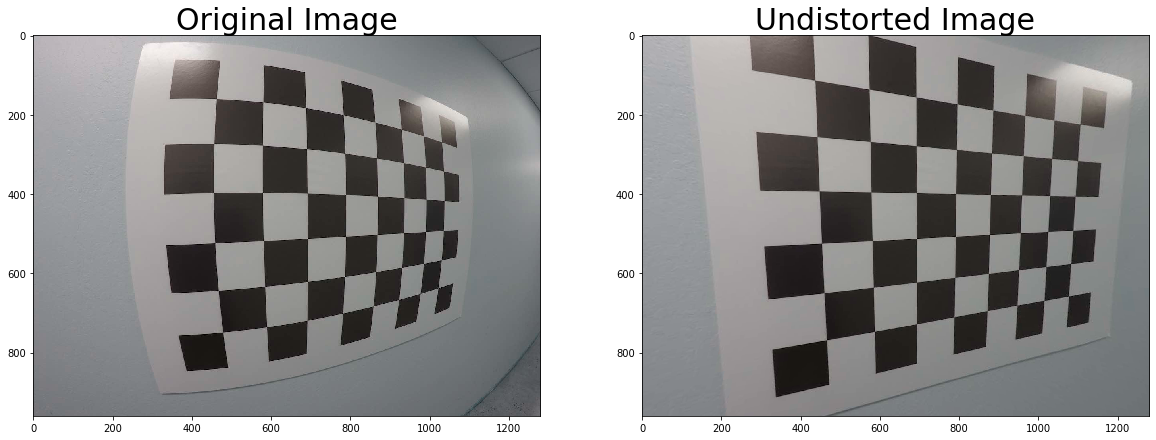

In [22]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "calibration_wide/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y
img_undistorted = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(img_undistorted)
ax2.set_title('Undistorted Image', fontsize=30)


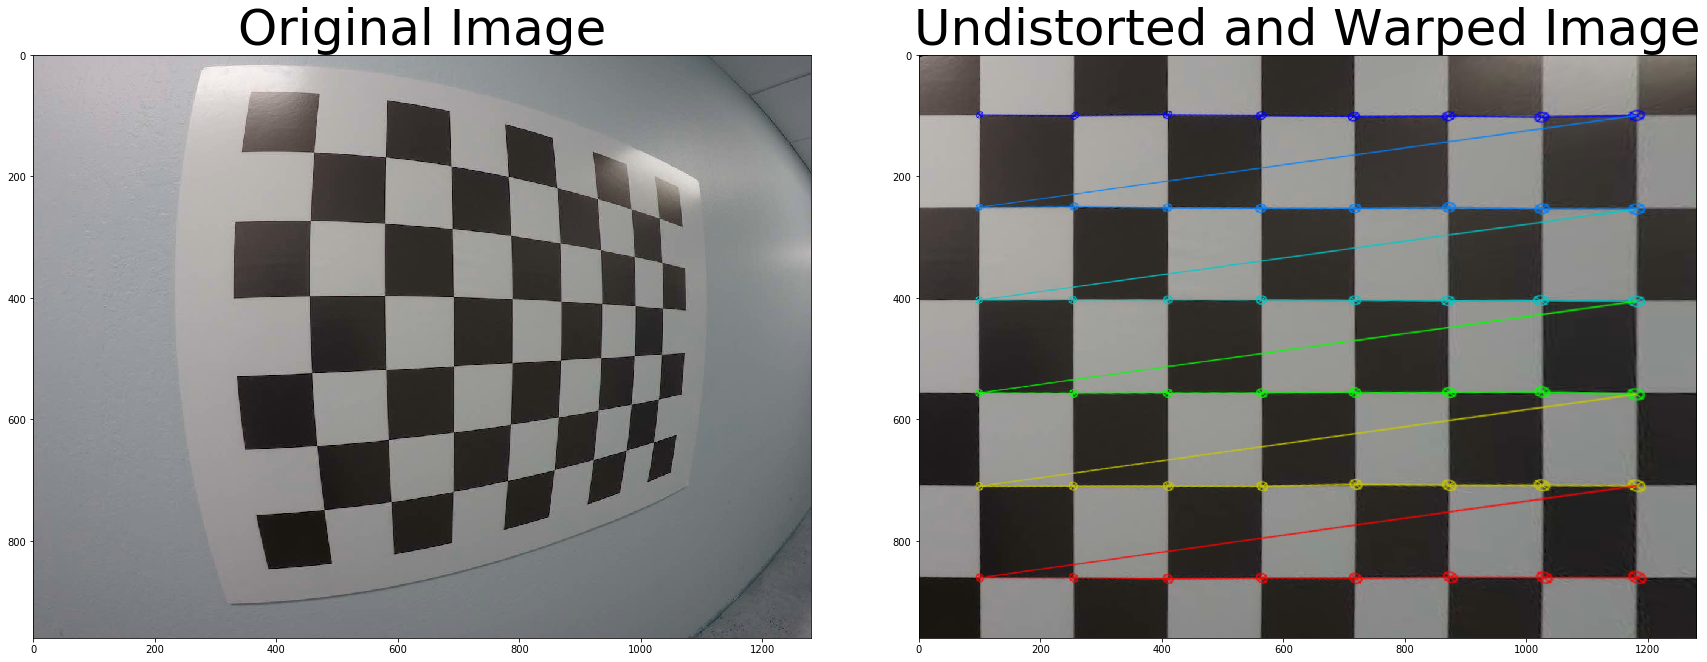

In [21]:
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    img_size = (img.shape[1], img.shape[0])
    # 1) Undistort using mtx and dist
    img_undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    img_gray = cv2.cvtColor(img_undistorted, cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(img_gray, (nx,ny), None)
    # 4) If corners found: 
            # a) draw corners
    if ret == True:
         cv2.drawChessboardCorners(img_undistorted, (nx,ny), corners, ret)
    # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
         #Note: you could pick any four of the detected corners 
         # as long as those four corners define a rectangle
         #One especially smart way to do this would be to use four well-chosen
         # corners that were automatically detected during the undistortion steps
         #We recommend using the automatic detection of corners in your code
         src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
    # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
         dst = np.float32([[100, 100], [img_size[0] - 100, 100], [img_size[0] - 100, img_size[1] - 100], [100, img_size[1] - 100]])
    # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
         M = cv2.getPerspectiveTransform(src, dst)
    # e) use cv2.warpPerspective() to warp your image to a top-down view
         warped = cv2.warpPerspective(img_undistorted, M, img_size)
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)